# The Complexity of Life Mimicked
3d printing of fractals

distinct fractals surfaces

6 fractal plates form a landscape plate 16x24x6 inch *

# Fractal Generation
create 3d fractals

# Fractal to Fractal Plate

# STL from fractal

# Visualize
pass to blender

# Fractal 1 - Octahedron flakes
A spiky surface of infinitely paurus pyrameids 

### Spiky Surface complete

In [57]:
from stl import mesh
import math
import numpy


vectors = numpy.array([
[
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
],                         
                           [
    [-1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
],                               
                 [
    [-1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
],          
                           [
    [1, 0, 0],
    [0, -1, 0],
    [0, 0, 1]
],                                       
])

spike_x = 3
spike_y = 3
distribution = 2
num_spikes = spike_x * spike_y
spikes = vectors.copy()
for x in range(spike_x):
    for y in range(spike_y):
        if x == 0 and y == 0:
            continue
        spike = vectors.copy()
        for vertex in spike:
            for point in vertex:
                point[0] += x * distribution
                point[1] += y * distribution
        spikes = numpy.concatenate([spikes, spike])


data = numpy.zeros(len(spikes), dtype=mesh.Mesh.dtype)
mesh = mesh.Mesh(data)

# x y z
data['vectors'] = spikes

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  del sys.path[0]


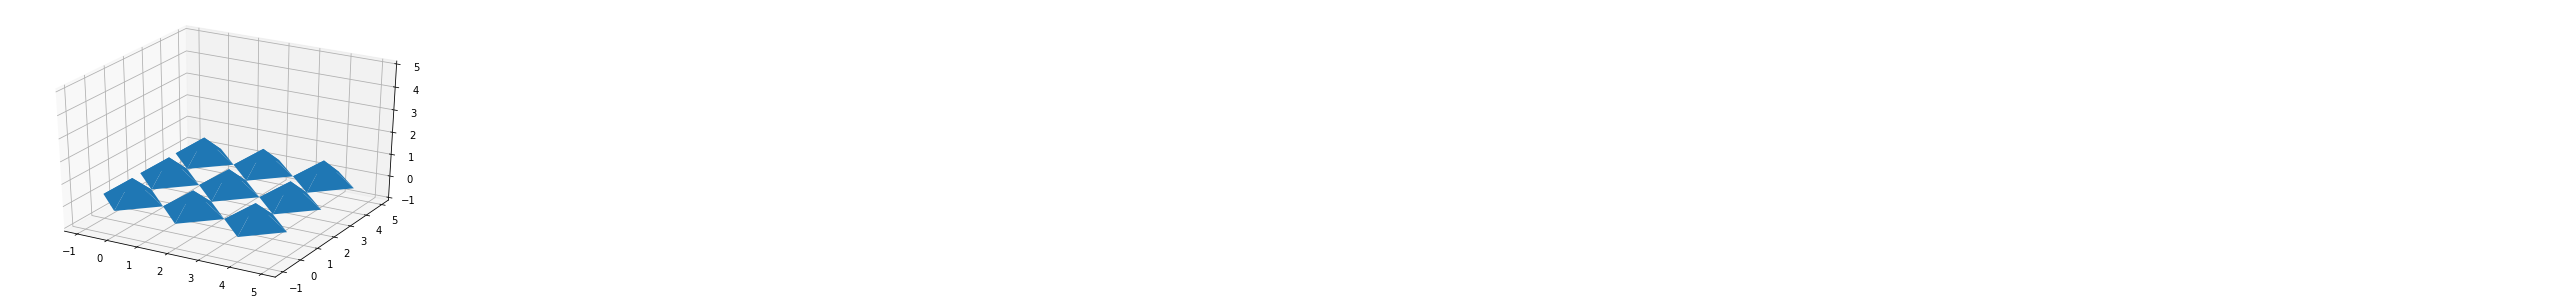

In [58]:
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)


# Render the cube faces
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(mesh.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate(mesh).flatten(-1)
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

mesh.save('spiky_surface.stl')